In [1]:
!pip install numpy pandas scikit-learn

In [72]:
!pip install scikit-learn

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.experimental import enable_hist_gradient_boosting  
from sklearn.ensemble import HistGradientBoostingClassifier, HistGradientBoostingRegressor
from sklearn.datasets import make_classification, make_regression
from sklearn.metrics import accuracy_score, mean_squared_error

In [88]:
grade_predict = pd.read_csv('Grades.csv')

In [89]:
print(grade_predict.head())

   Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102 EE-119  \
0  CS-97001     B-     D+     C-         C     C-     D+      D     C-     B-   
1  CS-97002      A      D     D+         D     B-      C      D      A     D+   
2  CS-97003      A      B      A        B-     B+      A     B-     B+     A-   
3  CS-97004      D     C+     D+         D      D     A-     D+     C-      D   
4  CS-97005     A-     A-     A-        B+      A      A     A-     B+      A   

   ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423 CS-412   CGPA  
0  ...     C-     C-     C-     C-     A-      A     C-      B     A-  2.205  
1  ...     D+      D      C      D     A-     B-      C      C      B  2.008  
2  ...      B      B      A      C      A      A      A     A-      A  3.608  
3  ...     D+      C     D+     C-     B-      B     C+     C+     C+  1.906  
4  ...     B-     B+     B+     B-     A-      A     A-     A-      A  3.448  

[5 rows x 43 columns]


In [91]:
print("Missing values per column before processing:")
print(grade_predict.isnull().sum())

Missing values per column before processing:
Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64


In [92]:
for column in grade_predict.columns:
    if grade_predict[column].dtype in ['int64', 'float64']:
        grade_predict[column].fillna(grade_predict[column].median(), inplace=True)
    else:
        if not grade_predict[column].mode().empty:
            grade_predict[column].fillna(grade_predict[column].mode()[0], inplace=True)
        else:
            grade_predict[column].fillna('Unknown', inplace=True)

In [93]:
print("\nMissing values per column after processing:")
print(grade_predict.isnull().sum())


Missing values per column after processing:
Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64


In [94]:
grade_predict.to_csv('cleaned_dataset.csv', index=False)
print(grade_predict.head())

   Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102 EE-119  \
0  CS-97001     B-     D+     C-         C     C-     D+      D     C-     B-   
1  CS-97002      A      D     D+         D     B-      C      D      A     D+   
2  CS-97003      A      B      A        B-     B+      A     B-     B+     A-   
3  CS-97004      D     C+     D+         D      D     A-     D+     C-      D   
4  CS-97005     A-     A-     A-        B+      A      A     A-     B+      A   

   ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423 CS-412   CGPA  
0  ...     C-     C-     C-     C-     A-      A     C-      B     A-  2.205  
1  ...     D+      D      C      D     A-     B-      C      C      B  2.008  
2  ...      B      B      A      C      A      A      A     A-      A  3.608  
3  ...     D+      C     D+     C-     B-      B     C+     C+     C+  1.906  
4  ...     B-     B+     B+     B-     A-      A     A-     A-      A  3.448  

[5 rows x 43 columns]


In [95]:
grade_mapping = {'A': 4, 'B': 3, 'C': 2, 'D': 1, 'F': 0}
for column in ['PH-121','HS-101','CY-105','HS-105/12','MT-111','CS-105','CS-106','EL-102','EE-119','ME-107','CS-107','HS-205/20','MT-222','EE-222','MT-224','CS-210','CS-211','CS-203','CS-214','EE-217','CS-212','CS-215','MT-331','EF-303','HS-304','CS-301','CS-302','TC-383','MT-442','EL-332','CS-318','CS-306','CS-312','CS-317','CS-403','CS-421','CS-406','CS-414','CS-419','CS-423','CS-412']:grade_predict[column] = grade_predict[column].map(grade_mapping)

In [96]:
X = grade_predict.drop(columns=['CGPA', 'Seat No.'])  
y = grade_predict['CGPA']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (456, 41)
Testing set shape: (115, 41)


In [109]:
regressor = HistGradientBoostingRegressor(random_state=42)
regressor.fit(X_train, y_train) 
y_pred = regressor.predict(X_test)  
mse = mean_squared_error(y_test, y_pred) 
print(f"Regression Mean Squared Error: {mse:.2f}")

Regression Mean Squared Error: 0.03


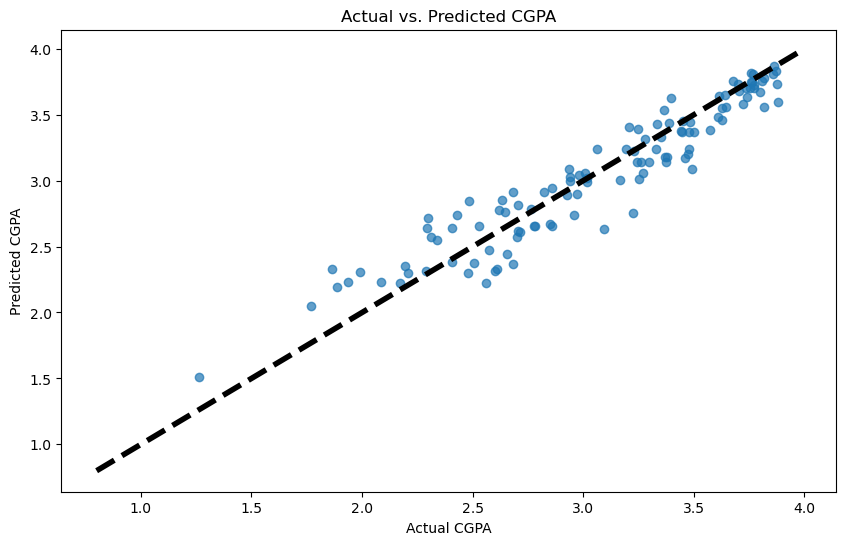

In [111]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual CGPA')
plt.ylabel('Predicted CGPA')
plt.title('Actual vs. Predicted CGPA')
plt.show()


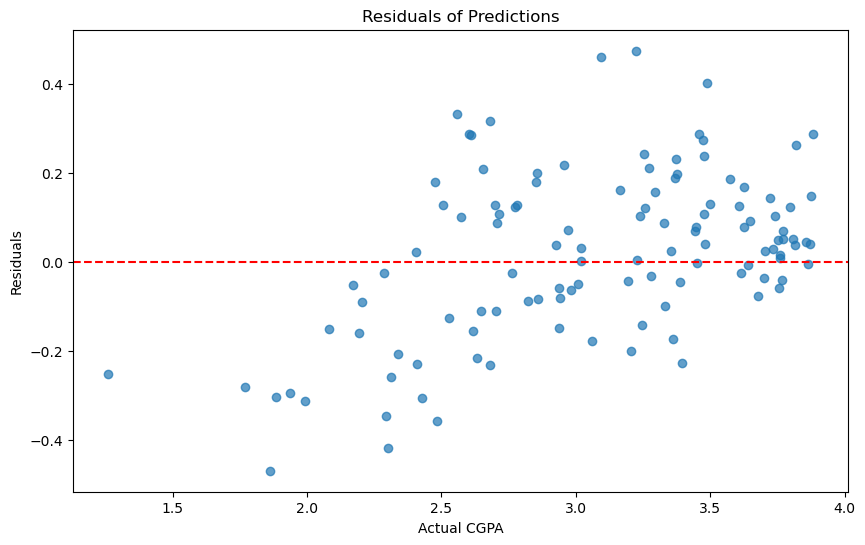

In [112]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.7)
plt.axhline(y=0, linestyle='--', color='red')
plt.xlabel('Actual CGPA')
plt.ylabel('Residuals')
plt.title('Residuals of Predictions')
plt.show()